# Training and testing

In this exercise you will apply the **training and testing** workflow to **titanic** dataset. And we are going to use **Decision Tree** to fit the dataset. 

In [1]:
import os, sys
import numpy as np
import pandas as pd

DATASET = '/dsa/data/all_datasets/titanic_ML/titanic.csv'
assert os.path.exists(DATASET)

Now go ahead and `import DecistionTree`, `train_test_split()`, and other required packages.

In [2]:
# Add your code below this comment (Question #E01)
# ----------------------------------

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report



In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

## Load Dataset

**Load dataset** from files into multi-dimensional array and understand its structure.

Note that this .csv file is comma separated. **Shuffle the dataset using the `.sample()` and `.reset_index()` method.**

In [5]:
# Add your code below this comment (Question #E02)
# ----------------------------------

df = pd.read_csv(DATASET, sep=',').sample(frac=1).reset_index(drop=True)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,1,36.0,0,0,7.7500,2,1
1,1,0,50.0,0,1,247.5208,0,1
2,1,1,55.0,0,0,50.0000,1,0
3,3,1,24.0,0,0,7.0500,1,0
4,1,1,27.0,0,0,30.5000,1,1


Print **number of rows**.

In [7]:
# Add your code below this comment (Question #E03)
# ----------------------------------

# df.shape
print('Rows, Columns: ', df.shape)


Rows, Columns:  (890, 8)


**Describe the dataset**.

In [8]:
# Add your code below this comment (Question #E04)
# ----------------------------------

print('Dataframe Statsitics\n')
df.describe()


Dataframe Statsitics



,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.312360,0.642697,29.548697,0.503371,0.351685,32.865772,0.895506,0.389888
std,0.837241,0.479475,13.379025,1.095286,0.790069,52.639685,0.529535,0.487999
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,13.775000,1.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,29.925000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000


**Store feature columns** (all except column 'survived') to a new variable `X`.

In [13]:
# Add your code below this comment (Question #E05)
# ----------------------------------

X = np.array(df.iloc[:,:-1])


**Store label column** (last column 'survived') to a new variable `y`.

In [14]:
# Add your code below this comment (Question #E06)
# ----------------------------------

y = np.array(df.survived)



**Create training/test split** off of `X` and `y`. Test dataset ratio: 25%.

In [15]:
# Add your code below this comment (Question #E07)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



**Create a decision tree model**, then **fit and score** the classifier.

Note that the model score will not be important for grading purpose in this exercise.

In [16]:
# Add your code below this comment (Question #E08)
# ----------------------------------

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.726457399103139

**Visualize the decision  tree**


|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_5 <= 26.12
|   |   |   |--- feature_2 <= 53.50
|   |   |   |   |--- feature_5 <= 20.25
|   |   |   |   |   |--- feature_2 <= 29.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  29.50
|   |   |   |   |   |   |--- feature_2 <= 31.25
|   |   |   |   |   |   |   |--- feature_5 <= 12.68
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  12.68
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  31.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  20.25
|   |   |   |   |   |--- feature_5 <= 23.46
|   |   |   |   |   |   |--- feature_2 <= 29.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  29.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  23.46
|   |   |   |   |   |   |--- feature_2 <= 43.00
|   |   |   |   |   |   | 

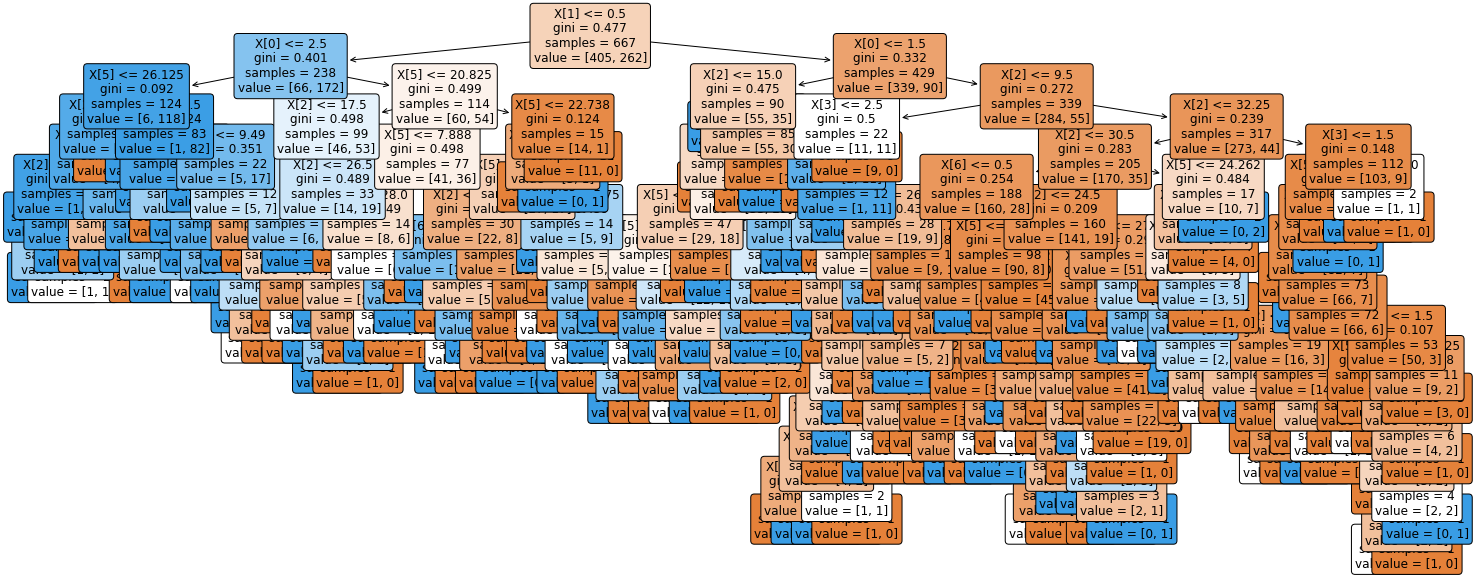

In [20]:
# Add your code below this comment (Question #E09)
# ----------------------------------

text_tree = export_text(model)
print(text_tree)

# -- or --

plt.figure(figsize=(25,10))
a = plot_tree(model,
             filled = True,
             rounded = True,
             fontsize = 12)


**Compare your decision tree model against a baseline**

In [22]:
# Add your code below this comment (Question #E10)
# ----------------------------------

# Using the Prior Strategy here. Will test more below

dummy_model = DummyClassifier(strategy='prior')
dummy_model.fit(X,y)
print(f"Accuracy: {dummy_model.score(X,y)}")

Accuracy: 0.6101123595505618


In [23]:
# Testing a few other dummy models for fun

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X,y)
print(f"Accuracy: {dummy_model.score(X,y)}")

Accuracy: 0.6101123595505618


In [24]:
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X,y)
print(f"Accuracy: {dummy_model.score(X,y)}")

Accuracy: 0.5325842696629214


In [25]:
dummy_model = DummyClassifier(strategy='uniform')
dummy_model.fit(X,y)
print(f"Accuracy: {dummy_model.score(X,y)}")

Accuracy: 0.5022471910112359


# Save your notebook!  Then `File > Close and Halt`